In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [4]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

data.head()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


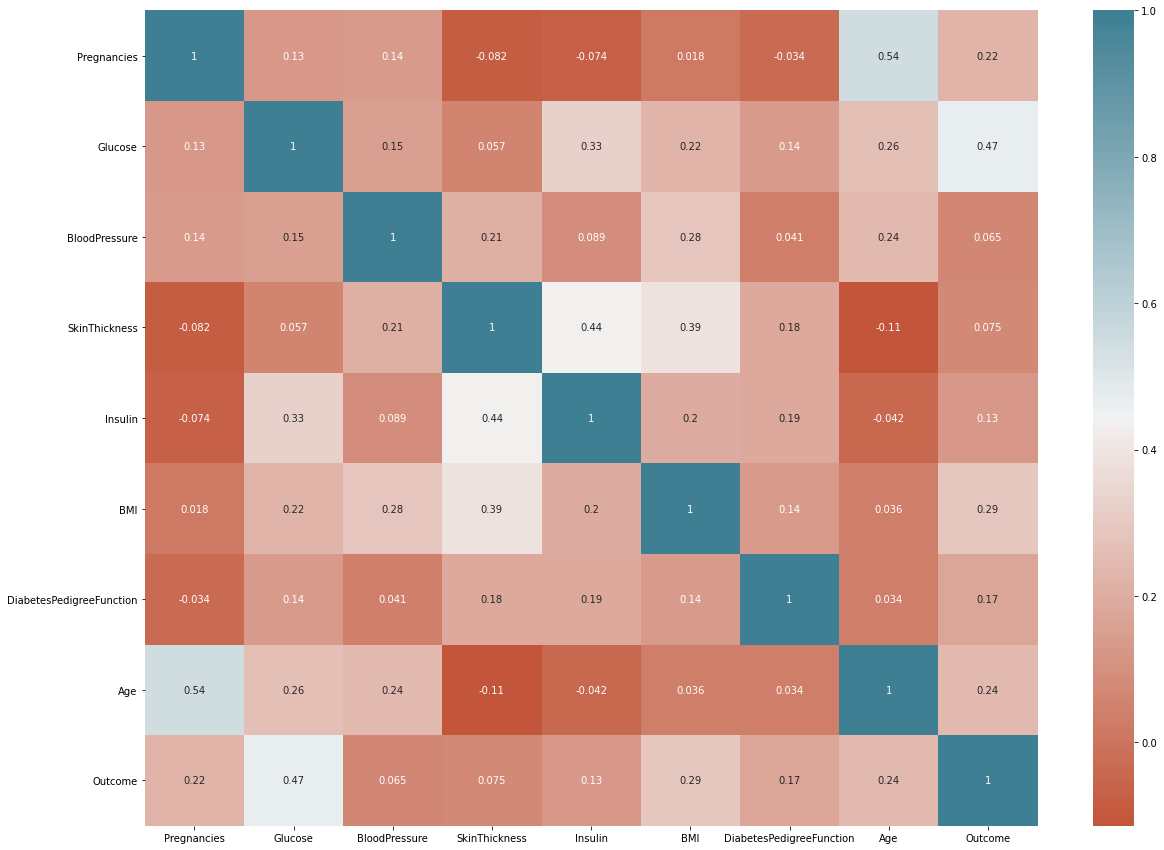

In [9]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
data.corr() ,
cmap=sns.diverging_palette(20,220, n=200),
annot=True)

In [11]:
 
corr_matrix = data.corr()
corr_matrix["Outcome"].sort_values(ascending = False)
# ('Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure')

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [84]:
# X = data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure']]
y = data.Outcome
X = data.drop(['Outcome'],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

## KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier as knn

knn_model = knn(n_neighbors=110)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=110)

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_valid)
mse = mean_squared_error(y_valid, train_preds)
rmse = sqrt(mse)
rmse

0.4629100498862757

In [88]:

print('My accuracy: ', knn_model.score(X_valid, y_valid)*100, '%')

My accuracy:  78.57142857142857 %


## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(solver='liblinear')
lg_model.fit(X_train, y_train)



LogisticRegression(solver='liblinear')

In [90]:
train_preds = lg_model.predict(X_valid)
mse = mean_squared_error(y_valid, train_preds)
rmse = sqrt(mse)
rmse

0.4264014327112209

In [91]:
print('My accuracy: ', lg_model.score(X_valid, y_valid)*100, '%')

My accuracy:  81.81818181818183 %


## SVM

In [57]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [58]:
train_preds = svc_model.predict(X_valid)
mse = mean_squared_error(y_valid, train_preds)
rmse = sqrt(mse)
rmse

0.4558423058385518

In [59]:
print('My accuracy: ', svc_model.score(X_valid, y_valid)*100, '%')

My accuracy:  79.22077922077922 %


In [92]:
## The best one is Logistic Regression